In [1]:
import pandas as pd 
from transformers import pipeline

c:\Users\senid\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read the csv file...

In [3]:
df = pd.read_csv("../data/commentary_2023.csv")


In [4]:
 #here is the csv file content...

In [5]:
df

,Unnamed: 0,commentary
0,19,Travis Head | Player of the Match - 137(120): ...
1,20,Adam Zampa: Interesting to see the strategy to...
2,21,"Mitchell Starc: He (Cummins) was phenomenal, h..."
3,22,Steve Smith: Incredible feeling! Atmosphere wa...
4,23,Mitch Marsh: Pure elation right now. Been the ...
...,...,...
370,442,Round the wicket to Head
371,443,"Bumrah to Warner, 3 runs, nice outswing again ..."
372,444,Bumrah round the wicket to Head and two slips ...
373,445,"Bumrah to Warner, FOUR, edgedddd and no-one go..."


In [6]:
#the unnamed column is redundant. So let's remove it...

In [7]:
df= df.drop(df.columns[0], axis =1)

In [8]:
#checking the NULL values...

In [9]:
df.isnull().sum()

commentary    0
dtype: int64

In [10]:
#checking the duplicate values...

In [11]:
duplicates = df.duplicated().sum()
print(duplicates)

0


In [12]:
#removing the eextra white space...

In [13]:
df["commentary"] = df["commentary"].str.strip()

In [14]:
#dataset after the cleaning process

In [15]:
df

,commentary
0,Travis Head | Player of the Match - 137(120): ...
1,Adam Zampa: Interesting to see the strategy to...
2,"Mitchell Starc: He (Cummins) was phenomenal, h..."
3,Steve Smith: Incredible feeling! Atmosphere wa...
4,Mitch Marsh: Pure elation right now. Been the ...
...,...
370,Round the wicket to Head
371,"Bumrah to Warner, 3 runs, nice outswing again ..."
372,Bumrah round the wicket to Head and two slips ...
373,"Bumrah to Warner, FOUR, edgedddd and no-one go..."


In [16]:
from transformers import pipeline

In [17]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [18]:
# Apply the model to the 'commentary' column
df['sentiment'] = df['commentary'].apply(
    lambda x: classifier(x)[0]['label'])
df['confidence'] = df['commentary'].apply(
    lambda x: classifier(x)[0]['score'])

# Format confidence scores to two decimal points
df['confidence'] = df['confidence'].apply(
    lambda x: round(x, 2))

# Display the updated DataFrame
print(df[['commentary', 'sentiment', 'confidence']])

                                            commentary sentiment  confidence
0    Travis Head | Player of the Match - 137(120): ...  POSITIVE        1.00
1    Adam Zampa: Interesting to see the strategy to...  POSITIVE        0.87
2    Mitchell Starc: He (Cummins) was phenomenal, h...  POSITIVE        1.00
3    Steve Smith: Incredible feeling! Atmosphere wa...  POSITIVE        1.00
4    Mitch Marsh: Pure elation right now. Been the ...  POSITIVE        0.99
..                                                 ...       ...         ...
370                           Round the wicket to Head  POSITIVE        0.99
371  Bumrah to Warner, 3 runs, nice outswing again ...  POSITIVE        0.64
372  Bumrah round the wicket to Head and two slips ...  POSITIVE        0.99
373  Bumrah to Warner, FOUR, edgedddd and no-one go...  NEGATIVE        0.56
374  Warner and Head are at the crease. Warner is o...  NEGATIVE        0.94

[375 rows x 3 columns]


In [19]:
# Save the DataFrame with sentiment results
df.to_csv("../data/out/commentary_with_sentiments.csv", index=False)
print("Updated dataset saved to 'data/out/commentary_with_sentiments.csv'")


Updated dataset saved to 'data/out/commentary_with_sentiments.csv'


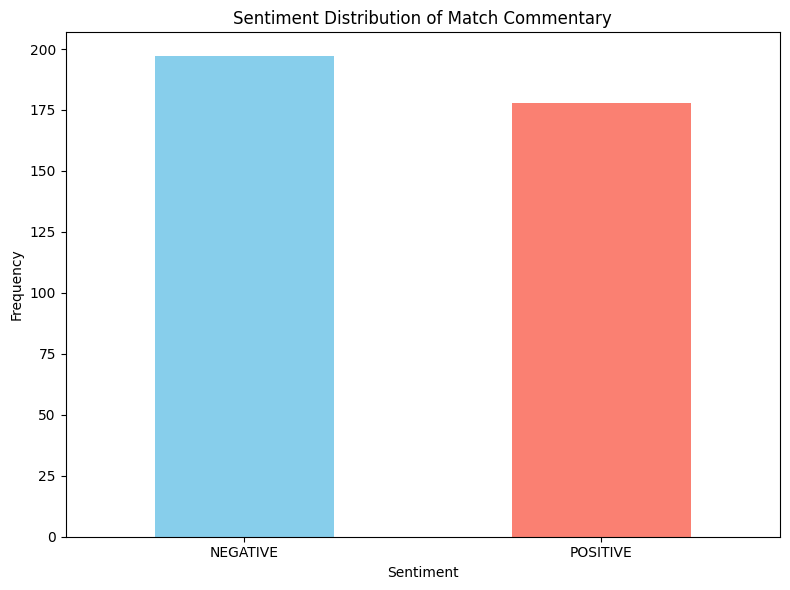

In [21]:
import matplotlib.pyplot as plt

# Count the number of sentiments
sentiment_counts = df['sentiment'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Sentiment Distribution of Match Commentary')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()